# 🏡 House Price Prediction using Linear Regression

## 📌 Project Overview  
This project builds a **house price prediction model** using **Linear Regression**.  
Given data on house size, the number of bedrooms, and location score, our model predicts the estimated price of a house.  

---

## 📊 Dataset Description  
Our dataset consists of the following features:  
- **Size** (in square feet) 🏠  
- **Bedrooms** (number of bedrooms) 🛏  
- **Location Score** (rating from 1 to 10) 📍  
- **Price** (target variable, house price in dollars) 💰  

---

## 🛠 Steps in This Project  
### 1️⃣ Data Collection & Preprocessing  
- Create a dataset with house size, bedrooms, and location score.  
- Handle missing or incorrect values.  
- Scale features (if necessary).  

### 2️⃣ Exploratory Data Analysis (EDA)  
- Visualize feature distributions.  
- Analyze correlations between variables.  
- Identify potential outliers.  

### 3️⃣ Building the Model (Linear Regression)  
- Split data into **training & testing sets**.  
- Train the **Linear Regression model** using `sklearn`.  
- Predict house prices on test data.  

### 4️⃣ Model Evaluation  
- Compare **Predicted vs Actual** house prices.  
- Use **Mean Squared Error (MSE)** and **R² Score** to measure accuracy.  
- Visualize model performance with scatter plots.  

### 5️⃣ User Interaction & Prediction  
- Take user input (house size, bedrooms, location score).  
- Predict price using the trained model.  

---

## 🔍 Why Linear Regression?  
- **Simple & Interpretable** – Easy to understand and implement.  
- **Captures Trends** – Identifies how house size, location, and bedrooms affect price.  
- **Efficient** – Works well when relationships between variables are mostly linear.  

---

## 📌 Expected Outcome  
- A trained **Linear Regression model** that predicts house prices.  
- Visualizations to explain data relationships and model performance.  
- User input functionality for real-time price predictions.  

🚀 **Let’s get started!**

# Importing Libraries

In [212]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pandas as pd
import pickle


# Load and Clean Data

In [214]:
import pandas as pd

# Updated dataset with more rows
data = {
    'Size': [1200, 1500, 1100, 1800, 1700, 1300, 1450, 1600, 1900, 1750],
    'Bedrooms': [2, 3, 2, 4, 3, 2, 3, 3, 4, 3],
    'Location_Score': [8, 9, 7, 8, 9, 7, 8, 9, 10, 8],
    'Price': [500000, 650000, 450000, 850000, 800000, 550000, 620000, 700000, 950000, 780000]
}




In [216]:
df=pd.DataFrame(data)
df['Price_per_sqft'] = df['Price'] / df['Size']
df

,Size,Bedrooms,Location_Score,Price,Price_per_sqft
0,1200,2,8,500000,416.666667
1,1500,3,9,650000,433.333333
2,1100,2,7,450000,409.090909
3,1800,4,8,850000,472.222222
4,1700,3,9,800000,470.588235
5,1300,2,7,550000,423.076923
6,1450,3,8,620000,427.586207
7,1600,3,9,700000,437.500000
8,1900,4,10,950000,500.000000
9,1750,3,8,780000,445.714286


In [218]:
df.describe()

,Size,Bedrooms,Location_Score,Price,Price_per_sqft
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1530.000000,2.900000,8.300000,685000.000000,443.577878
std,267.913751,0.737865,0.948683,160917.508197,28.808865
min,1100.000000,2.000000,7.000000,450000.000000,409.090909
25%,1337.500000,2.250000,8.000000,567500.000000,424.204244
50%,1550.000000,3.000000,8.000000,675000.000000,435.416667
75%,1737.500000,3.000000,9.000000,795000.000000,464.369748
max,1900.000000,4.000000,10.000000,950000.000000,500.000000


# Train Model

In [220]:
x=df[['Size','Bedrooms','Location_Score']]
y=df['Price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [222]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

#  Evaluate Model

In [224]:
y_pred=model.predict(x_test)


In [226]:
mse=mean_squared_error(y_test,y_pred)
print("mean squread error is: ",mse)
print("predict price:",y_pred)
print("Actual Price:",y_test.values)

mean squread error is:  277777777.7777765
predict price: [416666.66666667]
Actual Price: [400000]


# Predict for User Input

In [230]:
# 📌 Take user input for house details
size = float(input("Enter house size (in sqft): "))
bedrooms = int(input("Enter number of bedrooms: "))
location_score = float(input("Enter location score (1-10): "))

# 📌 Match column names exactly as used in model training
user_input = pd.DataFrame([[size, bedrooms, location_score]], 
                          columns=['Size (sq ft)', 'Bedrooms', 'Location_Score'])

# 📌 Predict house price
predicted_price = model.predict(user_input)[0]

# 📌 Display predicted price
print(f"\n🏡 Estimated House Price: $ {predicted_price:,.2f}")

Enter house size (in sqft):  6000
Enter number of bedrooms:  5
Enter location score (1-10):  9



🏡 Estimated House Price: $1,105,555.56


# Future Distributions

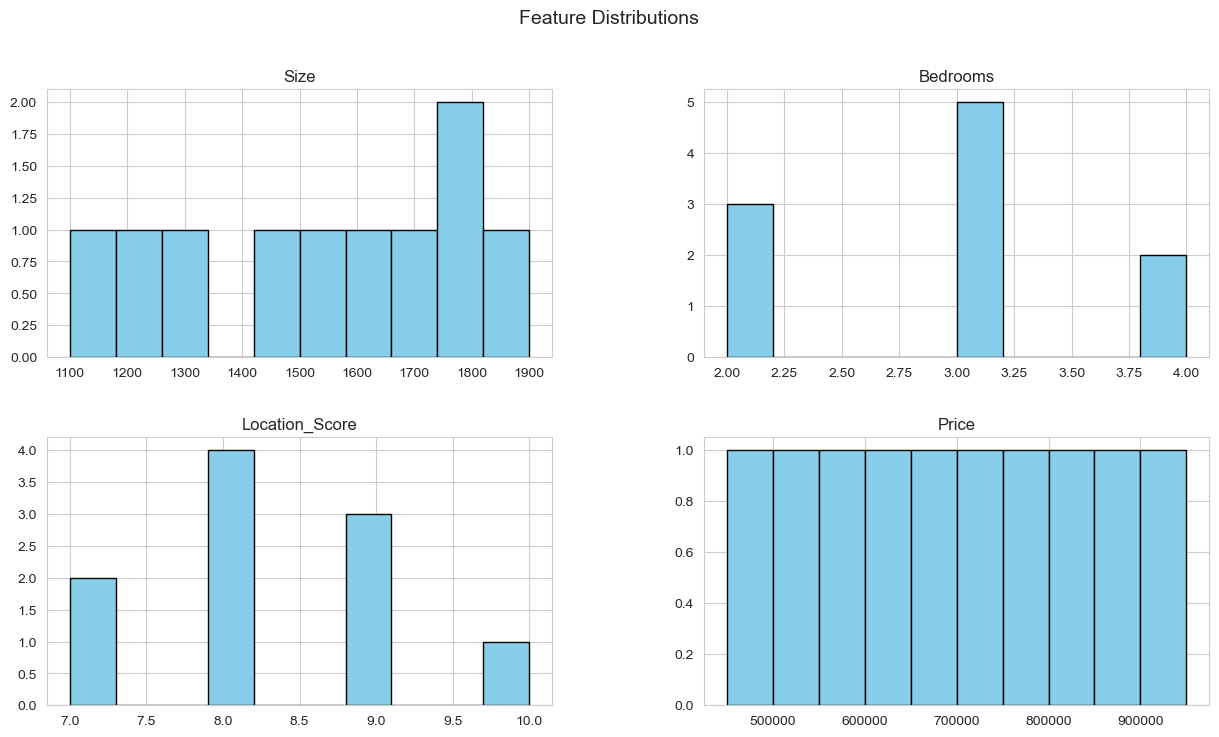

In [172]:
# Set style
sns.set_style("whitegrid")
# Plot histograms
df.hist(figsize=(15, 8), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Save the trained model to a file

In [234]:


# Save the trained model to a file
with open("house_price_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")

✅ Model saved successfully!
